<a href="https://colab.research.google.com/github/canbethegodfatherofyourlife/Positive-Volume-Index-PVI-/blob/main/Positive_Volume_Index_(PVI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Positive Volume Index (PVI)**

The positive volume index (PVI) is an indicator used in technical analysis that provides signals for price changes based on positive increases in trading volume.
 The PVI helps in assessing trend strength and potentially confirming price reversals and can be calculated for popular market indexes as well as used to analyze movements in individual securities.

**Significance**

When the volume of a security traded during a day exceeds the previous day, PVI shows an uptrend and when the volume decreases compared to the last day PVI shows a downtrend.
When the PVI stays above a 255-day MA, it shows people are having a bullish outlook on the stock and vice-versa.


**Formula**

If today’s volume is greater than yesterday’s volume, then:

 **PVI = PPVI+ (TCP−YCP)*PPVI/YCP**

where:
PVI=positive volume index
PPVI=previous positive volume index
TCP=today’s closing price
YCP=yesterday’s closing price
​
If today’s volume is lesser than yesterday’s volume, then:

**PVI = Previous PVI**

In [3]:
import numpy as np
import pandas as pd
import talib as ta
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# input
symbol = 'TSLA'
start = '2020-11-01'
end   = '2021-11-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100
2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700
2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100
2020-11-05,428.299988,440.000000,424.000000,438.089996,438.089996,28414500
2020-11-06,436.100006,436.570007,424.279999,429.950012,429.950012,21706000


In [5]:
returns = df['Adj Close'].pct_change()
vol_increase = (df['Volume'].shift(1) < df['Volume'])

pvi = pd.Series(data=np.nan, index=df['Adj Close'].index, dtype='float64')

pvi.iloc[0] = 1000
for i in range(1,len(pvi)):
    if vol_increase.iloc[i]:
        pvi.iloc[i] = pvi.iloc[i - 1] * (1.0 + returns.iloc[i])
    else:
        pvi.iloc[i] = pvi.iloc[i - 1]

pvi = pvi.replace([np.inf, -np.inf], np.nan).fillna(1000)

df['PVI'] = pd.Series(pvi)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,PVI
Date,,,,,,,
2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100,1000.000000
2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700,1058.400498
2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100,1058.400498
2020-11-05,428.299988,440.000000,424.000000,438.089996,438.089996,28414500,1058.400498
2020-11-06,436.100006,436.570007,424.279999,429.950012,429.950012,21706000,1058.400498


No handles with labels found to put in legend.


Text(0.5, 0, 'Date')

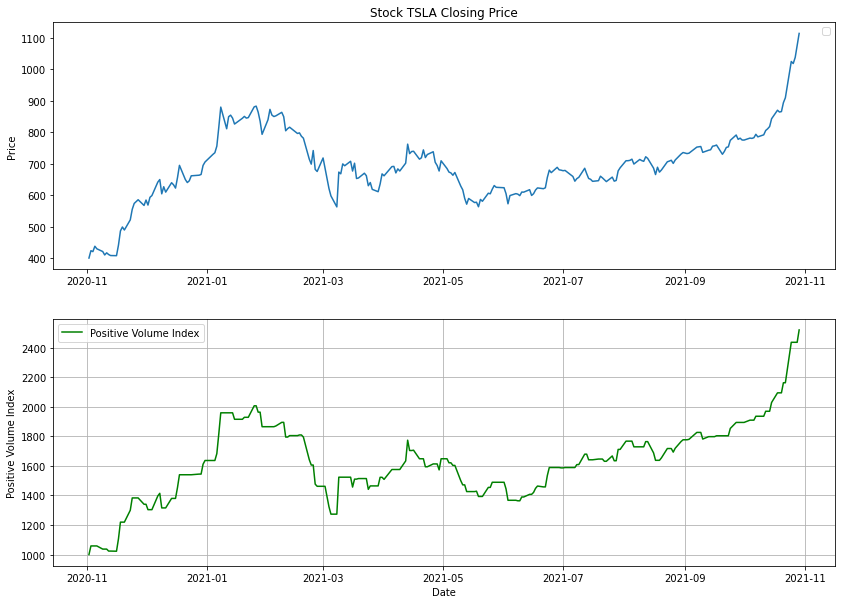

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['PVI'], label='Positive Volume Index', color='green')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Positive Volume Index')
ax2.set_xlabel('Date')